# Numerical data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### First doing using pandas library

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [5]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
x = df.drop(columns='Survived')
y = df['Survived']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
x_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [10]:
mean_age = x_train['Age'].mean()
medium_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
mediam_fare = x_train['Fare'].mean()

In [11]:
mean_fare

np.float64(32.51778772189349)

In [12]:
x_train['Age_mediam'] = x_train['Age'].fillna(medium_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

x_train['fare_mediam'] = x_train['Fare'].fillna(mediam_fare)
x_train['fare_mean'] = x_train['Fare'].fillna(mean_fare)

In [13]:
x_train.sample(10)

Age     Fare  Family  Age_mediam   Age_mean  fare_mediam  fare_mean
555  62.0  26.5500       0        62.0  62.000000      26.5500    26.5500
823  27.0  12.4750       1        27.0  27.000000      12.4750    12.4750
6    54.0  51.8625       0        54.0  54.000000      51.8625    51.8625
658  23.0  13.0000       0        23.0  23.000000      13.0000    13.0000
108  38.0   7.8958       0        38.0  38.000000       7.8958     7.8958
616  34.0  14.4000       2        34.0  34.000000      14.4000    14.4000
522   NaN   7.2250       0        28.0  29.498846       7.2250     7.2250
686  14.0  39.6875       5        14.0  14.000000      39.6875    39.6875
703  25.0   7.7417       0        25.0  25.000000       7.7417     7.7417
476  34.0  21.0000       1        34.0  34.000000      21.0000    21.0000

In [14]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['Age_mediam'].var())
print('Age Variance after mean imputation: ', x_train['Age_mean'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['fare_mediam'].var())
print('Fare Variance after mean imputation: ', x_train['fare_mean'].var())

Original Age variable variance:  210.2517072477435
Age Variance after median imputation:  169.20731007048155
Age Variance after mean imputation:  168.85193366872227
Original Fare variable variance:  2761.0314349486343
Fare Variance after median imputation:  2621.232374951235
Fare Variance after mean imputation:  2621.232374951235


#### if you apply mean/median so the variance is shrink but the shrink is too high so that is problem

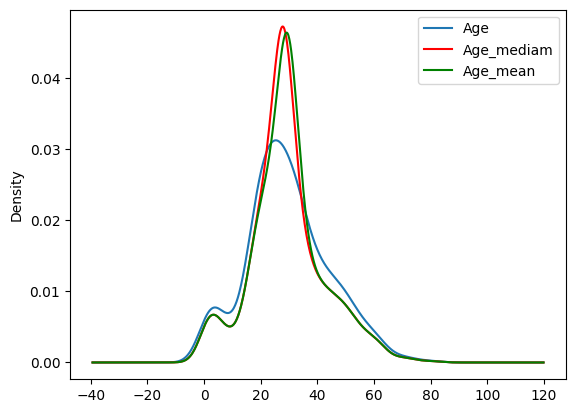

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Age_mediam'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [16]:
# the distribution too change so this is not fare

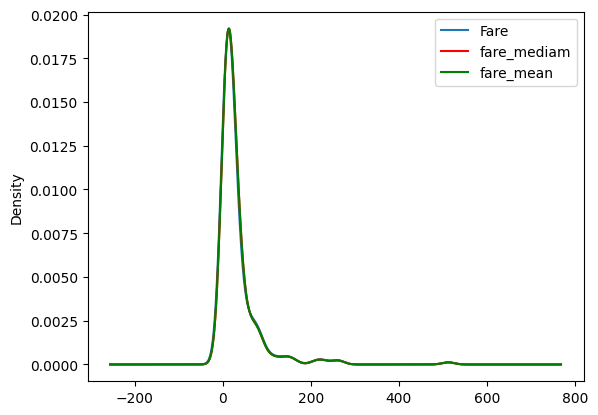

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)
# variable imputed with the median
x_train['fare_mediam'].plot(kind='kde', ax=ax, color='red')
# variable imputed with the mean
x_train['fare_mean'].plot(kind='kde', ax=ax, color='green')
# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [18]:
# the curves are overlapp means it's too good

In [19]:
x_train.cov()       #Too changes are not good

Age         Fare     Family  Age_mediam    Age_mean  \
Age          210.251707    75.481375  -6.993325  210.251707  210.251707   
Fare          75.481375  2761.031435  18.599163   63.938058   60.224654   
Family        -6.993325    18.599163   2.830892   -5.587710   -5.616299   
Age_mediam   210.251707    63.938058  -5.587710  169.207310  168.851934   
Age_mean     210.251707    60.224654  -5.616299  168.851934  168.851934   
fare_mediam   71.193767  2761.031435  17.657433   60.700688   57.175304   
fare_mean     71.193767  2761.031435  17.657433   60.700688   57.175304   

             fare_mediam    fare_mean  
Age            71.193767    71.193767  
Fare         2761.031435  2761.031435  
Family         17.657433    17.657433  
Age_mediam     60.700688    60.700688  
Age_mean       57.175304    57.175304  
fare_mediam  2621.232375  2621.232375  
fare_mean    2621.232375  2621.232375

<Axes: >

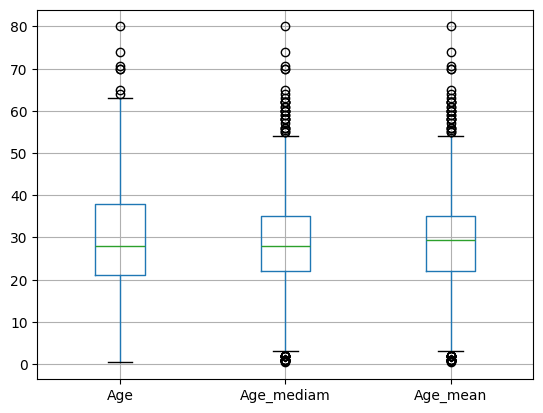

In [20]:
# create a box plot
x_train[['Age', 'Age_mediam', 'Age_mean']].boxplot()

In [21]:
# Outlier increase

<Axes: >

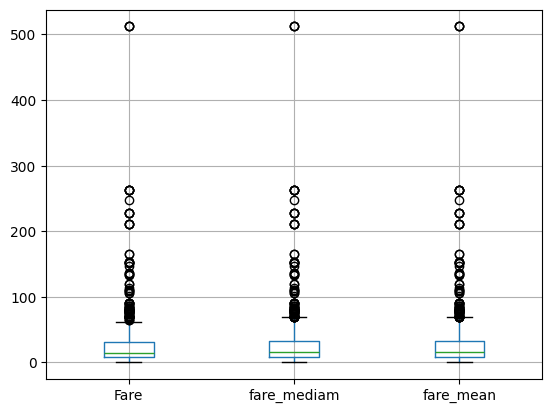

In [22]:
x_train[['Fare', 'fare_mediam', 'fare_mean']].boxplot()   #No more change

# Using sklear

In [23]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [25]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [26]:
trf.fit(X_train)

/home/master/python/MachineLeaning/venv2/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [27]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [28]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [29]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

### arbiatry 

In [30]:
#x_train['Age_mediam'] = x_train['Age'].fillna(99)

In [31]:
# do this types all with single value

In [32]:
# imputer1 = SimpleImputer(strategy='constant',fill_vl)

# Categorical data

In [33]:
df = pd.read_csv('train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])
df2 = pd.read_csv('train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])
df3 = pd.read_csv('train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])

In [34]:
df.head()

FireplaceQu GarageQual  SalePrice
0         NaN         TA     208500
1          TA         TA     181500
2          TA         TA     223500
3          Gd         TA     140000
4          TA         TA     250000

### using mode

In [35]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

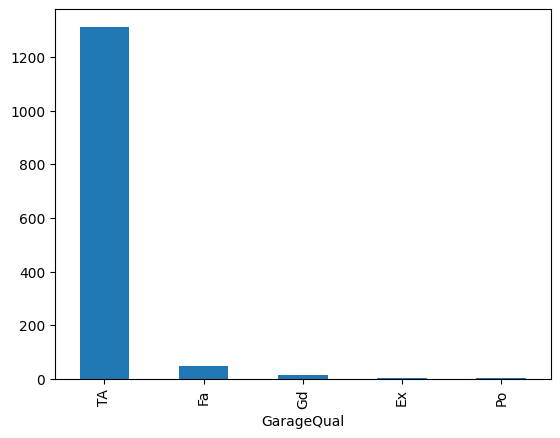

In [36]:
df['GarageQual'].value_counts().plot(kind='bar')

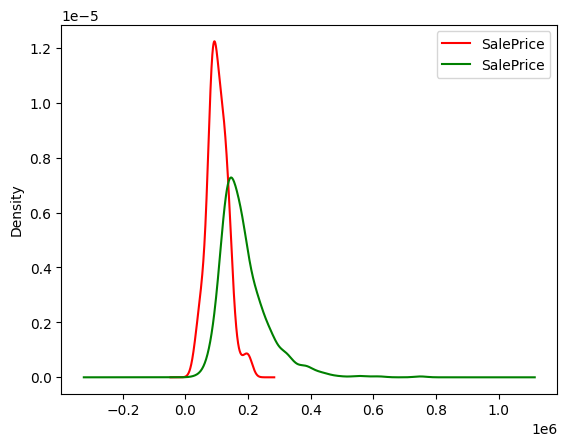

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)


df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='green')
# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [38]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [39]:
df['GarageQual'].fillna('TA', inplace=True)

/tmp/ipykernel_3456/1818999247.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA', inplace=True)


In [40]:
df.isnull().sum()

FireplaceQu    690
GarageQual       0
SalePrice        0
dtype: int64

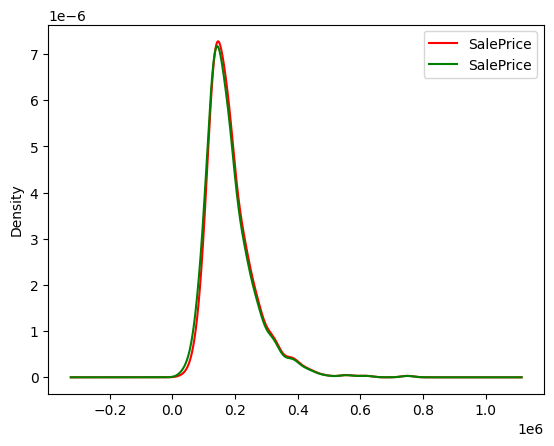

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='green')
# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [42]:
# But these process we can not apply Fireplace column for two region
#1. percentage of missing value
#2. Mode value not too large

In [43]:
# Do same thing by using sikit learn by using strategy='most frequent'

/tmp/ipykernel_3456/984528704.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['GarageQual'].fillna('Missing', inplace=True)


Text(0, 0.5, 'Number of houses')

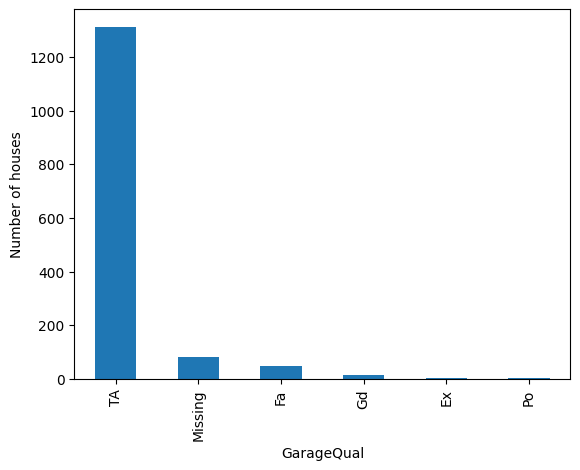

In [44]:
df2['GarageQual'].fillna('Missing', inplace=True)

df2['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df3.drop(columns=['SalePrice']),df3['SalePrice'],test_size=0.2)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant',fill_value='Missing')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

imputer.statistics_



/home/master/python/MachineLeaning/venv2/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array(['Missing', 'Missing'], dtype=object)

# Random value generator

In [46]:
# Random value generator work on the Both categorical and numerical both

In [47]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [48]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [49]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [50]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
x_train.head()

Age     Fare
331  45.5  28.5000
733  23.0  13.0000
382  32.0   7.9250
704  26.0   7.8542
813   6.0  31.2750

In [53]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [54]:
x_train.head()

Age     Fare  Age_imputed
331  45.5  28.5000         45.5
733  23.0  13.0000         23.0
382  32.0   7.9250         32.0
704  26.0   7.8542         26.0
813   6.0  31.2750          6.0

In [55]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

/tmp/ipykernel_3456/1258921994.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
/tmp/ipykernel_3456/1258921994.

In [56]:
x_train.isnull().sum()

Age            140
Fare             0
Age_imputed      0
dtype: int64

In [57]:
import seaborn as sns

<Axes: ylabel='Density'>

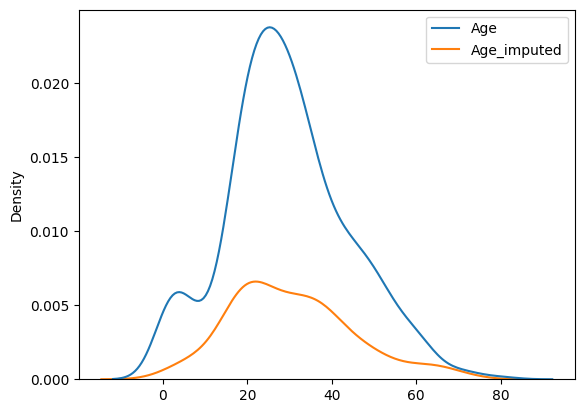

In [58]:
sns.kdeplot([x_train['Age'],x_test["Age_imputed"]], label='Orignal')

/tmp/ipykernel_3456/3925229177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
/tmp/ipykernel_3456/3925229177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False)


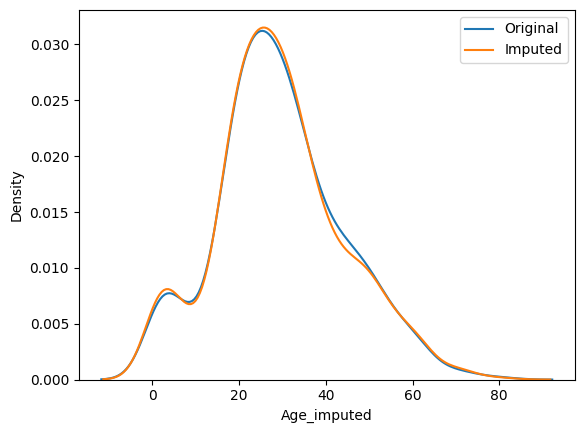

In [59]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [60]:
# co-variance change

In [61]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  210.2517072477435
Variance after random imputation:  212.96376114647038


In [62]:
# sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [63]:
# This line of code generate random value same based on input

## We do similar method with categorical data

In [64]:
# If the frequency of data is similar of data after imputation so it's not good

In [65]:
'''
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp
'''

"\ntemp = pd.concat(\n        [\n            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),\n            X_train['FireplaceQu_imputed'].value_counts() / len(df)\n        ],\n        axis=1)\n\ntemp.columns = ['original', 'imputed']\n\ntemp\n"

# Missing indicator

## In this approcah we can create a different column which is cantain true or false if value is null so return true or if non null value conatin so return false 

In [67]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [68]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [71]:
from sklearn.impute import MissingIndicator,SimpleImputer

In [74]:
si = MissingIndicator()

In [75]:
si.fit(x_train)

MissingIndicator()

In [78]:
X_train_missing = si.transform(x_train)
x_test_missing = si.transform(x_test)

In [83]:
x_train['Age_missing_imputer'] = X_train_missing

In [87]:
x_train.sample(10)

Age     Fare  Age_imputed  Age_missing_imputer
385  18.0  73.5000         18.0                False
560   NaN   7.7500         49.0                 True
304   NaN   8.0500         51.0                 True
240   NaN  14.4542         21.0                 True
267  25.0   7.7750         25.0                False
487  58.0  29.7000         58.0                False
638  41.0  39.6875         41.0                False
860  41.0  14.1083         41.0                False
261   3.0  31.3875          3.0                False
704  26.0   7.8542         26.0                False

# Automation 

In [89]:
df = pd.read_csv('titanic.csv')

In [99]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [91]:
df = pd.read_csv('titanic.csv')

In [93]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

In [94]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [95]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [96]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [98]:
x_train.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
331       1    male  45.5      0      0  28.5000        S
733       2    male  23.0      0      0  13.0000        S
382       3    male  32.0      0      0   7.9250        S
704       3    male  26.0      1      0   7.8542        S
813       3  female   6.0      4      2  31.2750        S

In [113]:
Numerical_Feature = ['Age', 'Fare']
Categorical_Feature = ['Embarked', 'Sex']

numerical_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder(handle_unknown='ignore'))
])

In [114]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transform, Numerical_Feature),
        ('cat', categorical_transform, Categorical_Feature)
    ]
)

In [115]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [116]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [117]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [118]:
grid_search.fit(x_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 0.1, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [119]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.784


In [120]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

param_classifier__C param_preprocessor__cat__imputer__strategy  \
0                   0.1                              most_frequent   
1                   0.1                              most_frequent   
2                   0.1                                   constant   
3                   0.1                                   constant   
4                   1.0                              most_frequent   
5                   1.0                              most_frequent   
6                   1.0                                   constant   
7                   1.0                                   constant   
8                  10.0                              most_frequent   
9                  10.0                              most_frequent   
10                 10.0                                   constant   
11                 10.0                                   constant   
12                100.0                              most_frequent   
13                100.0                              most_frequent   
14                100.0                                   constant   
15                100.0                                   constant   

   param_preprocessor__num__imputer__strategy  mean_test_score  
0                                        mean         0.783725  
1                                      median         0.783725  
2                                        mean         0.783725  
3                                      median         0.783725  
4                                        mean         0.782316  
5                                      median         0.782316  
6                                        mean         0.782316  
7                                      median         0.782316  
8                                        mean         0.782316  
9                                      median         0.782316  
10                                       mean         0.782316  
11                                     median         0.782316  
12                                       mean         0.782316  
13                                     median         0.782316  
14                                       mean         0.782316  
15                                     median         0.782316